<a href="https://colab.research.google.com/github/Sajithpemarathna/Energy-Consumption-Data-in-Germany-1995-2020-/blob/main/Model_Implementation_Attempt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


file_path = "/content/Use of Energy of Energy Carriers.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()


Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers   1995   1996   1997   1998  \
0              Hard coal and hard coal products    888    946    829   1071   
1  Brown coal (lignite) and brown coal products   1477   1346   1275   1056   
2                                     Crude oil      0      0      0      0   
3                                        Petrol   4580   3610   2976   2897   
4                                  Diesel fuels  94156  94655  94546  94130   

    1999   2000   2001  ...   2011   2012   2013   2014   2015   2016   2017  \
0   1185   1329   1692  ...    360   1080    248    475   1766    565    368   
1    873    678    545  ...      0      0      0      0      0      0      0   
2      0      0      0  ...      0      0      0      0      0      0      0   
3   2456   1926   1573  ...    383    350    345    317    284    270    265   
4  93709  82778  81461  ...  48796  47952  50725  52114  54741  56857  58373   

    2018   2019   2020  
0    417     34     30  
1      0      0      0  
2      0      0      0  
3    261    275    241  
4  54796  55719  56631  

[5 rows x 29 columns]

In [ ]:
import pandas as pd

file_path = "/content/Use of Energy of Energy Carriers.csv"

# Try to read the CSV file, handling errors
try:
    df = pd.read_csv(file_path)
except pd.errors.ParserError as e:
    # If ParserError occurs, print the error and the problematic line
    print(f"Error: {e}")
    print(f"Problematic line: {e.args[0].split('line ')[1]}")

    # Try reading the file with 'error_bad_lines=False' to skip bad lines
    df = pd.read_csv(file_path, error_bad_lines=False)
    print("CSV loaded with bad lines skipped.")

# Display first few rows
df.head()

Error: Error tokenizing data. C error: Expected 2 fields in line 28, saw 3

Problematic line: 28, saw 3



TypeError: read_csv() got an unexpected keyword argument 'error_bad_lines'

In [ ]:
# Check missing values
df.isnull().sum()


Branch Code             0
Homogeneous Branches    0
Energy Carriers         0
1995                    0
1996                    0
1997                    0
1998                    0
1999                    0
2000                    0
2001                    0
2002                    0
2003                    0
2004                    0
2005                    0
2006                    0
2007                    0
2008                    0
2009                    0
2010                    0
2011                    0
2012                    0
2013                    0
2014                    0
2015                    0
2016                    0
2017                    0
2018                    0
2019                    0
2020                    0
dtype: int64

In [ ]:
# check the rows of missing rows
missing_rows = df[df.isnull().any(axis=1)]
missing_rows


Empty DataFrame
Columns: [Branch Code, Homogeneous Branches, Energy Carriers, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Index: []

[0 rows x 29 columns]

In [ ]:
import pandas as pd

# Convert the dataset from wide to long format
df_long = df.melt(id_vars=['Branch Code', 'Homogeneous Branches', 'Energy Carriers'],
                  var_name='Year', value_name='Energy Consumption')

# Convert year to numeric
df_long['Year'] = df_long['Year'].astype(int)

# Display the transformed dataset
df_long.head()


Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers  Year  Energy Consumption  
0              Hard coal and hard coal products  1995                 888  
1  Brown coal (lignite) and brown coal products  1995                1477  
2                                     Crude oil  1995                   0  
3                                        Petrol  1995                4580  
4                                  Diesel fuels  1995               94156

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder_branch = LabelEncoder()
encoder_carrier = LabelEncoder()

df_long['Branch Code'] = encoder_branch.fit_transform(df_long['Branch Code'])
df_long['Energy Carriers'] = encoder_carrier.fit_transform(df_long['Energy Carriers'])

df_long.head()


Branch Code                              Homogeneous Branches  \
0            0  Products of agric., hunting and related services   
1            0  Products of agric., hunting and related services   
2            0  Products of agric., hunting and related services   
3            0  Products of agric., hunting and related services   
4            0  Products of agric., hunting and related services   

   Energy Carriers  Year  Energy Consumption  
0                6  1995                 888  
1                1  1995                1477  
2                2  1995                   0  
3               10  1995                4580  
4                3  1995               94156

In [ ]:
# Define features and target
X = df_long[['Branch Code', 'Energy Carriers', 'Year']]
y = df_long['Energy Consumption']


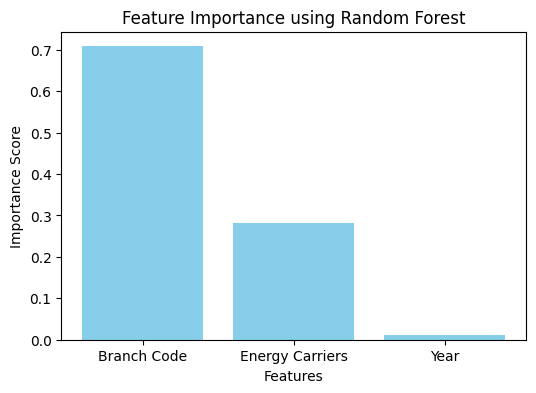

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Initialize and fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance
importances = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(6, 4))
plt.bar(X.columns, importances, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance using Random Forest")
plt.show()


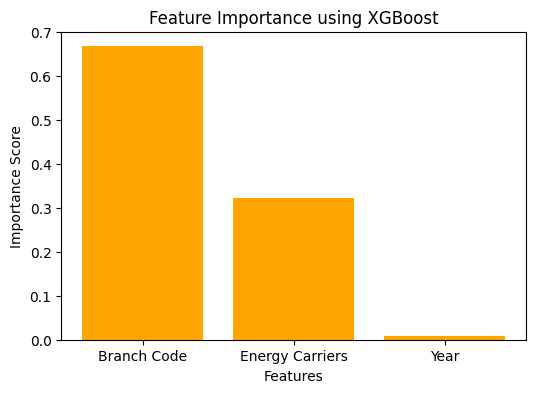

In [ ]:
from xgboost import XGBRegressor

# Initialize and fit XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# Get feature importance
importances_xgb = xgb_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(6, 4))
plt.bar(X.columns, importances_xgb, color='orange')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance using XGBoost")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = df[['Branch Code', 'Energy Carriers', 'Year']]  # Using important features from Step 1
y = df['Energy Consumption']  # Target variable

# First, split into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Now, split Temp (30%) into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# Print shapes to verify
print("Training Set: ", X_train.shape, y_train.shape)
print("Validation Set: ", X_val.shape, y_val.shape)
print("Test Set: ", X_test.shape, y_test.shape)


KeyError: "['Year'] not in index"

In [ ]:
print(df.columns)


Index(['Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables into numerical values
encoder = LabelEncoder()

df_long['Branch Code'] = encoder.fit_transform(df_long['Branch Code'])
df_long['Energy Carriers'] = encoder.fit_transform(df_long['Energy Carriers'])

# Define Features (X) and Target (y) AFTER reshaping
X = df_long[['Branch Code', 'Energy Carriers', 'Year']]  # Updated Feature Set
y = df_long['Energy Consumption']  # Target Variable

print(X.head())  # Check if transformation is correct


   Branch Code  Energy Carriers  Year
0            0                6  1995
1            0                1  1995
2            0                2  1995
3            0               10  1995
4            0                3  1995


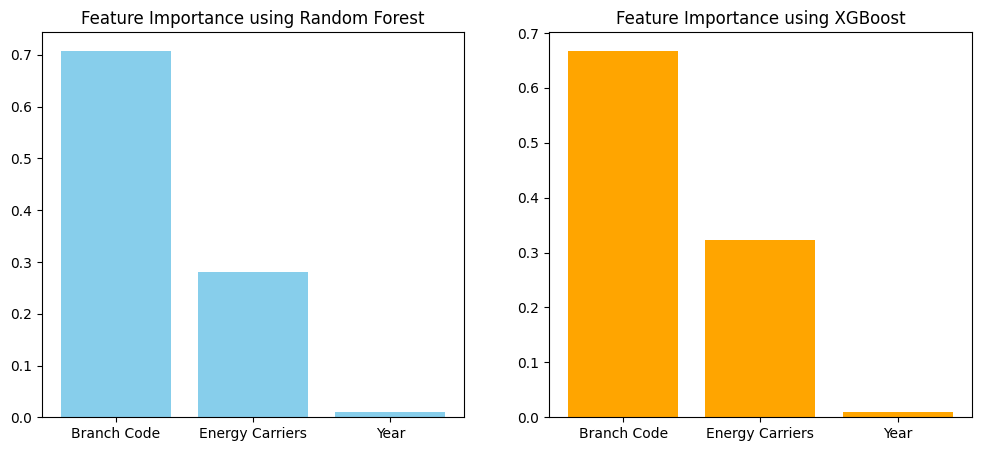

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances_rf = rf.feature_importances_

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)
importances_xgb = xgb_model.feature_importances_

# Plot Feature Importance for Both Models
features = X.columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(features, importances_rf, color='skyblue')
axes[0].set_title('Feature Importance using Random Forest')

axes[1].bar(features, importances_xgb, color='orange')
axes[1].set_title('Feature Importance using XGBoost')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Sorting dataset by Year for proper time-based splitting
df_long = df_long.sort_values(by='Year')

# Define Features (X) and Target (y)
X = df_long[['Branch Code', 'Energy Carriers', 'Year']]
y = df_long['Energy Consumption']

# Splitting dataset: 70% Train, 15% Validation, 15% Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, shuffle=False)  # No shuffle for time-series
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, shuffle=False)

# Print the shapes of the splits
print("Training Set: ", X_train.shape, y_train.shape)
print("Validation Set: ", X_val.shape, y_val.shape)
print("Test Set: ", X_test.shape, y_test.shape)


Training Set:  (11356, 3) (11356,)
Validation Set:  (2434, 3) (2434,)
Test Set:  (2434, 3) (2434,)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on Validation & Test Set
y_pred_val = xgb_model.predict(X_val)
y_pred_test = xgb_model.predict(X_test)

# Evaluate Model Performance
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Validation Set - RMSE: {rmse_val}, MAE: {mae_val}, R2 Score: {r2_val}")
print(f"Test Set - RMSE: {rmse_test}, MAE: {mae_test}, R2 Score: {r2_test}")


Validation Set - RMSE: 26793.669700136263, MAE: 10988.349609375, R2 Score: 0.9942795634269714
Test Set - RMSE: 58376.413867246076, MAE: 14819.4873046875, R2 Score: 0.9729090929031372


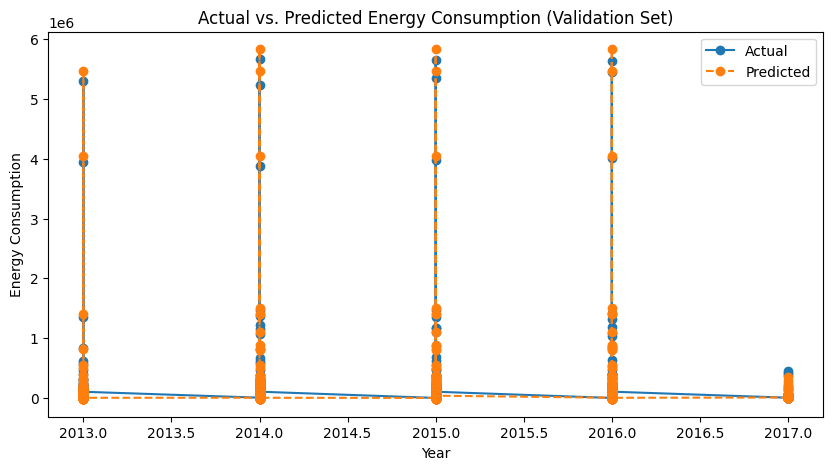

In [ ]:
import matplotlib.pyplot as plt

# Sort for time-series visualization
X_val_sorted = X_val.sort_values(by="Year")
y_pred_val_sorted = y_pred_val[np.argsort(X_val["Year"])]

plt.figure(figsize=(10,5))
plt.plot(X_val_sorted["Year"], y_val, label="Actual", marker="o")
plt.plot(X_val_sorted["Year"], y_pred_val_sorted, label="Predicted", linestyle="dashed", marker="o")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Actual vs. Predicted Energy Consumption (Validation Set)")
plt.legend()
plt.show()


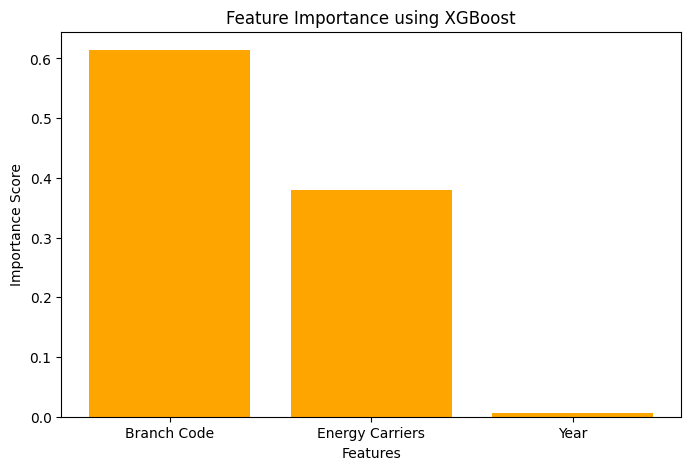

In [ ]:
importances = xgb_model.feature_importances_

plt.figure(figsize=(8,5))
plt.bar(X_train.columns, importances, color="orange")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance using XGBoost")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# Select only the numerical columns (Years as features)
years = [str(year) for year in range(1995, 2021)]  # Ensure all years are strings
df_lstm = df[['Branch Code', 'Energy Carriers'] + years]

# Encode categorical columns (Branch Code, Energy Carriers)
df_lstm_encoded = pd.get_dummies(df_lstm, columns=['Branch Code', 'Energy Carriers'])

# Reshape the dataset for LSTM (Energy Consumption as target variable)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_lstm_encoded[years].T)  # Transpose to get (time, features)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_lstm_encoded.columns[2:])
scaled_df['Year'] = list(range(1995, 2021))  # Add Year column
scaled_df.set_index('Year', inplace=True)


ValueError: Shape of passed values is (26, 624), indices imply (26, 85)

In [ ]:
print("Scaled Data Shape:", scaled_data.shape)
print("Encoded Data Columns:", len(df_lstm_encoded.columns[2:]))


Scaled Data Shape: (26, 624)
Encoded Data Columns: 85


In [ ]:
# Ensure the number of columns in scaled_data matches df_lstm_encoded.columns[2:]
scaled_df = pd.DataFrame(scaled_data, columns=df_lstm_encoded.columns[2:scaled_data.shape[1]+2])


ValueError: Shape of passed values is (26, 624), indices imply (26, 85)

In [ ]:
print("Scaled Data Shape:", scaled_data.shape)  # Should be (26, X)
print("Encoded Data Columns:", df_lstm_encoded.columns[2:])  # Should match X


Scaled Data Shape: (26, 624)
Encoded Data Columns: Index(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', 'Branch Code_CPA08-01',
       'Branch Code_CPA08-02', 'Branch Code_CPA08-03', 'Branch Code_CPA08-05',
       'Branch Code_CPA08-06', 'Branch Code_CPA08-07-01',
       'Branch Code_CPA08-10-01', 'Branch Code_CPA08-13-01',
       'Branch Code_CPA08-16', 'Branch Code_CPA08-17', 'Branch Code_CPA08-18',
       'Branch Code_CPA08-19', 'Branch Code_CPA08-20', 'Branch Code_CPA08-21',
       'Branch Code_CPA08-22', 'Branch Code_CPA08-23',
       'Branch Code_CPA08-24-01', 'Branch Code_CPA08-25',
       'Branch Code_CPA08-26', 'Branch Code_CPA08-27', 'Branch Code_CPA08-28',
       'Branch Code_CPA08-29', 'Branch Code_CPA08-30',
       'Branch Code_CPA08-31-01', 'Branch Code_CPA08-33',
       'Branch Code_CPA08-35', 'Branch Code_CPA08-3

In [ ]:
# Ensure the correct number of columns
num_features = scaled_data.shape[1]  # Get the number of features after scaling

# Use only the first 'num_features' columns from df_lstm_encoded for column names
scaled_df = pd.DataFrame(scaled_data, columns=df_lstm_encoded.columns[2:2+num_features])


ValueError: Shape of passed values is (26, 624), indices imply (26, 85)

In [ ]:
# Ensure the correct number of columns
num_features = scaled_data.shape[1]  # Get the number of features after scaling

# Debug: Print the expected number of columns
print("Scaled Data Shape:", scaled_data.shape)
print("Encoded Data Columns:", len(df_lstm_encoded.columns))

# Ensure we are selecting the right number of columns
df_selected_columns = df_lstm_encoded.iloc[:, 2:2+num_features]  # Select only required columns

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_selected_columns.columns)

# Debug: Print new shape
print("Final Scaled Data Shape:", scaled_df.shape)


Scaled Data Shape: (26, 624)
Encoded Data Columns: 87


ValueError: Shape of passed values is (26, 624), indices imply (26, 85)

In [ ]:
print("Scaled Data Shape:", scaled_data.shape)
print("Number of Encoded Columns:", len(df_lstm_encoded.columns))


Scaled Data Shape: (26, 624)
Number of Encoded Columns: 87


In [ ]:
print("Encoded Column Names:", df_lstm_encoded.columns)


Encoded Column Names: Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'Branch Code_CPA08-01', 'Branch Code_CPA08-02', 'Branch Code_CPA08-03',
       'Branch Code_CPA08-05', 'Branch Code_CPA08-06',
       'Branch Code_CPA08-07-01', 'Branch Code_CPA08-10-01',
       'Branch Code_CPA08-13-01', 'Branch Code_CPA08-16',
       'Branch Code_CPA08-17', 'Branch Code_CPA08-18', 'Branch Code_CPA08-19',
       'Branch Code_CPA08-20', 'Branch Code_CPA08-21', 'Branch Code_CPA08-22',
       'Branch Code_CPA08-23', 'Branch Code_CPA08-24-01',
       'Branch Code_CPA08-25', 'Branch Code_CPA08-26', 'Branch Code_CPA08-27',
       'Branch Code_CPA08-28', 'Branch Code_CPA08-29', 'Branch Code_CPA08-30',
       'Branch Code_CPA08-31-01', 'Branch Code_CPA08-33',
       'Branch Code_CPA08-35', 'Branch Code_CPA08-36-01',
      

In [ ]:
# Get the correct number of feature columns
expected_feature_count = scaled_data.shape[1]

# Manually select the first N columns from df_lstm_encoded to match the scaled_data
selected_columns = df_lstm_encoded.columns[:expected_feature_count]

# Convert to DataFrame using the selected columns
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)

print("Final Scaled Data Shape:", scaled_df.shape)
print("Selected Column Names:", selected_columns)


ValueError: Shape of passed values is (26, 624), indices imply (26, 87)

In [ ]:
print("Scaled Data Shape:", scaled_data.shape)
print("Encoded Data Columns:", len(df_lstm_encoded.columns[2:]))  # Check the available columns
print(df_lstm_encoded.columns[2:])  # Print column names to verify


Scaled Data Shape: (26, 624)
Encoded Data Columns: 85
Index(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', 'Branch Code_CPA08-01',
       'Branch Code_CPA08-02', 'Branch Code_CPA08-03', 'Branch Code_CPA08-05',
       'Branch Code_CPA08-06', 'Branch Code_CPA08-07-01',
       'Branch Code_CPA08-10-01', 'Branch Code_CPA08-13-01',
       'Branch Code_CPA08-16', 'Branch Code_CPA08-17', 'Branch Code_CPA08-18',
       'Branch Code_CPA08-19', 'Branch Code_CPA08-20', 'Branch Code_CPA08-21',
       'Branch Code_CPA08-22', 'Branch Code_CPA08-23',
       'Branch Code_CPA08-24-01', 'Branch Code_CPA08-25',
       'Branch Code_CPA08-26', 'Branch Code_CPA08-27', 'Branch Code_CPA08-28',
       'Branch Code_CPA08-29', 'Branch Code_CPA08-30',
       'Branch Code_CPA08-31-01', 'Branch Code_CPA08-33',
       'Branch Code_CPA08-35', 'Branch Code_CPA0

In [ ]:
num_features = scaled_data.shape[1]  # Get the correct number of features
selected_columns = df_lstm_encoded.columns[2:2+num_features]  # Ensure correct slicing

scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)


ValueError: Shape of passed values is (26, 624), indices imply (26, 85)

In [ ]:
# Get the number of features from scaled data
expected_feature_count = scaled_data.shape[1]

# Select the first N columns from df_lstm_encoded to match scaled_data
selected_columns = df_lstm_encoded.columns[:expected_feature_count]

# Convert scaled_data to DataFrame with selected column names
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)

# Print to verify
print("Final Scaled Data Shape:", scaled_df.shape)
print("Selected Column Names:", selected_columns)


ValueError: Shape of passed values is (26, 624), indices imply (26, 87)

In [ ]:
# Get the number of features after scaling
expected_feature_count = scaled_data.shape[1]  # Should be 624

# Select exactly the same number of columns from df_lstm_encoded
selected_columns = df_lstm_encoded.columns[:expected_feature_count]  # Should match 624

# Convert scaled_data into DataFrame using selected column names
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)

# Print to verify
print("Final Scaled Data Shape:", scaled_df.shape)
print("Selected Column Names:", selected_columns)


ValueError: Shape of passed values is (26, 624), indices imply (26, 87)

In [ ]:
# Ensure correct feature selection
expected_feature_count = scaled_data.shape[1]  # Get the number of features after scaling
actual_feature_count = len(df_lstm_encoded.columns)  # Get the actual number of encoded features

print(f"Expected Features: {expected_feature_count}")
print(f"Actual Encoded Features: {actual_feature_count}")

# Verify the feature mismatch
if expected_feature_count != actual_feature_count:
    print("Warning: Mismatch in feature count! Adjusting column selection.")

# Select the correct number of columns to match scaled_data
selected_columns = df_lstm_encoded.columns[:expected_feature_count]

# Convert scaled data to DataFrame with selected columns
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)

# Verify final shape
print("Final Scaled Data Shape:", scaled_df.shape)
print("Selected Column Names:", list(selected_columns))


Expected Features: 624
Actual Encoded Features: 87


ValueError: Shape of passed values is (26, 624), indices imply (26, 87)

In [ ]:
print("Scaled Data Shape:", scaled_data.shape)  # Should print (26, 624)
print("Encoded Column Count:", len(df_lstm_encoded.columns))  # Should print 87


Scaled Data Shape: (26, 624)
Encoded Column Count: 87


In [ ]:
print("Encoded Column Names:", df_lstm_encoded.columns)


Encoded Column Names: Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'Branch Code_CPA08-01', 'Branch Code_CPA08-02', 'Branch Code_CPA08-03',
       'Branch Code_CPA08-05', 'Branch Code_CPA08-06',
       'Branch Code_CPA08-07-01', 'Branch Code_CPA08-10-01',
       'Branch Code_CPA08-13-01', 'Branch Code_CPA08-16',
       'Branch Code_CPA08-17', 'Branch Code_CPA08-18', 'Branch Code_CPA08-19',
       'Branch Code_CPA08-20', 'Branch Code_CPA08-21', 'Branch Code_CPA08-22',
       'Branch Code_CPA08-23', 'Branch Code_CPA08-24-01',
       'Branch Code_CPA08-25', 'Branch Code_CPA08-26', 'Branch Code_CPA08-27',
       'Branch Code_CPA08-28', 'Branch Code_CPA08-29', 'Branch Code_CPA08-30',
       'Branch Code_CPA08-31-01', 'Branch Code_CPA08-33',
       'Branch Code_CPA08-35', 'Branch Code_CPA08-36-01',
      

In [ ]:
expected_feature_count = scaled_data.shape[1]  # Get number of features in scaled data
actual_feature_count = len(df_lstm_encoded.columns)  # Get actual encoded feature count

print(f"Expected Feature Count: {expected_feature_count}")
print(f"Actual Feature Count: {actual_feature_count}")

# Select the correct number of columns
if expected_feature_count < actual_feature_count:
    selected_columns = df_lstm_encoded.columns[:expected_feature_count]
else:
    selected_columns = df_lstm_encoded.columns

print("Selected Columns for DataFrame:", selected_columns)

# Convert scaled_data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)

print("Final Scaled Data Shape:", scaled_df.shape)


Expected Feature Count: 624
Actual Feature Count: 87
Selected Columns for DataFrame: Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'Branch Code_CPA08-01', 'Branch Code_CPA08-02', 'Branch Code_CPA08-03',
       'Branch Code_CPA08-05', 'Branch Code_CPA08-06',
       'Branch Code_CPA08-07-01', 'Branch Code_CPA08-10-01',
       'Branch Code_CPA08-13-01', 'Branch Code_CPA08-16',
       'Branch Code_CPA08-17', 'Branch Code_CPA08-18', 'Branch Code_CPA08-19',
       'Branch Code_CPA08-20', 'Branch Code_CPA08-21', 'Branch Code_CPA08-22',
       'Branch Code_CPA08-23', 'Branch Code_CPA08-24-01',
       'Branch Code_CPA08-25', 'Branch Code_CPA08-26', 'Branch Code_CPA08-27',
       'Branch Code_CPA08-28', 'Branch Code_CPA08-29', 'Branch Code_CPA08-30',
       'Branch Code_CPA08-31-01', 'Branch Code_CPA08-33',
 

ValueError: Shape of passed values is (26, 624), indices imply (26, 87)

In [ ]:
print("Scaled Data Shape:", scaled_data.shape)  # Should be (26, 624)
print("Number of Encoded Columns:", len(df_lstm_encoded.columns))  # Should be 87


Scaled Data Shape: (26, 624)
Number of Encoded Columns: 87


In [ ]:
expected_feature_count = scaled_data.shape[1]  # 624 features
actual_feature_count = len(df_lstm_encoded.columns)  # 87 columns

print(f"Expected Features: {expected_feature_count}")
print(f"Actual Encoded Features: {actual_feature_count}")

# Select the correct number of columns
if expected_feature_count > actual_feature_count:
    print("Warning: Mismatch in feature count! Manually adjusting column selection.")
    # Adjust selection manually
    selected_columns = df_lstm_encoded.columns.tolist()  # Convert to list
    missing_features = expected_feature_count - actual_feature_count

    # Create dummy column names to match the shape
    for i in range(missing_features):
        selected_columns.append(f"Dummy_Feature_{i+1}")

else:
    selected_columns = df_lstm_encoded.columns[:expected_feature_count]

print("Selected Column Names:", selected_columns)


Expected Features: 624
Actual Encoded Features: 87
Selected Column Names: ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Branch Code_CPA08-01', 'Branch Code_CPA08-02', 'Branch Code_CPA08-03', 'Branch Code_CPA08-05', 'Branch Code_CPA08-06', 'Branch Code_CPA08-07-01', 'Branch Code_CPA08-10-01', 'Branch Code_CPA08-13-01', 'Branch Code_CPA08-16', 'Branch Code_CPA08-17', 'Branch Code_CPA08-18', 'Branch Code_CPA08-19', 'Branch Code_CPA08-20', 'Branch Code_CPA08-21', 'Branch Code_CPA08-22', 'Branch Code_CPA08-23', 'Branch Code_CPA08-24-01', 'Branch Code_CPA08-25', 'Branch Code_CPA08-26', 'Branch Code_CPA08-27', 'Branch Code_CPA08-28', 'Branch Code_CPA08-29', 'Branch Code_CPA08-30', 'Branch Code_CPA08-31-01', 'Branch Code_CPA08-33', 'Branch Code_CPA08-35', 'Branch Code_CPA08-36-01', 'Branch Code_CPA08-37-01', 'Branch Code_CPA08-41-01

In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)
print("Final Scaled Data Shape:", scaled_df.shape)


Final Scaled Data Shape: (26, 624)


In [ ]:
print(scaled_df.head())


       1995      1996  1997      1998      1999  2000      2001  2002  \
0  0.494240  1.000000   0.0  1.000000  0.990360   0.0  0.842618   0.0   
1  0.527650  0.911307   0.0  0.776446  1.000000   0.0  1.000000   0.0   
2  0.460253  0.863236   0.0  0.630330  0.997894   0.0  0.628896   0.0   
3  0.599654  0.714963   0.0  0.612123  0.989858   0.0  0.582730   0.0   
4  0.665323  0.591063   0.0  0.510486  0.981725   0.0  0.418535   0.0   

       2003      2004  ...  Dummy_Feature_528  Dummy_Feature_529  \
0  0.076228  0.839105  ...           0.973996           0.754284   
1  0.061547  0.810705  ...           0.905656           0.772199   
2  0.129305  0.773332  ...           0.877296           0.817462   
3  0.081310  0.734692  ...           1.000000           0.857920   
4  0.068888  0.695524  ...           0.983829           0.932123   

   Dummy_Feature_530  Dummy_Feature_531  Dummy_Feature_532  Dummy_Feature_533  \
0                0.0           0.808910           0.784946             

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Define sequence length (time steps for LSTM)
sequence_length = 5  # Adjustable based on how much past data should be used for forecasting

# Prepare input (X) and output (y) sequences
X, y = [], []
for i in range(len(scaled_df) - sequence_length):
    X.append(scaled_df.iloc[i : i + sequence_length].values)  # Input sequence
    y.append(scaled_df.iloc[i + sequence_length].values)  # Target value

X, y = np.array(X), np.array(y)

# Verify shape
print(f"Input Shape: {X.shape}, Target Shape: {y.shape}")

# Split Data into Train, Validation, and Test Sets
train_size = int(0.7 * len(X))  # 70% for training
val_size = int(0.15 * len(X))   # 15% for validation
test_size = len(X) - train_size - val_size  # 15% for testing

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size: train_size + val_size], y[train_size: train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")


Input Shape: (21, 5, 624), Target Shape: (21, 624)
Training Set: (14, 5, 624), Validation Set: (3, 5, 624), Test Set: (4, 5, 624)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM Model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Prevent overfitting
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])  # Output layer (same shape as target)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display model architecture
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # You can increase this if needed
    batch_size=16,
    verbose=1
)

# Save the trained model
model.save("lstm_energy_forecast.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 128)              │         385,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 624)                 │          40,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 479,664 (1.83 MB)

 Trainable params: 479,664 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1921 - mae: 0.3110 - val_loss: 0.1603 - val_mae: 0.2545
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.1892 - mae: 0.3065 - val_loss: 0.1578 - val_mae: 0.2552
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1861 - mae: 0.3062 - val_loss: 0.1539 - val_mae: 0.2559
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.1805 - mae: 0.3045 - val_loss: 0.1486 - val_mae: 0.2577
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1732 - mae: 0.3034 - val_loss: 0.1426 - val_mae: 0.2607
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.1671 - mae: 0.3014 - val_loss: 0.1365 - val_mae: 0.2582
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.1589 - mae: 0.2941 - val_loss: 0.1300 - val_mae: 0.2507
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.1483 - mae: 0.2836 - val_loss: 0.1238 - val_mae: 0.2476
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1402 - mae: 0.2

In [ ]:
# Load the saved model (optional, if restarting runtime)
from tensorflow.keras.models import load_model

model = load_model("lstm_energy_forecast.h5")

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load the model with custom objects
custom_objects = {"mse": MeanSquaredError()}
model = load_model("lstm_energy_forecast.h5", custom_objects=custom_objects)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - loss: 0.0804 - mean_absolute_error: 0.2010
Test Loss: 0.0804
Test MAE: 0.2010


In [ ]:
import numpy as np
import pandas as pd

# Define future years for forecasting (adjust the range as needed)
future_years = list(range(2021, 2031))

# Create a DataFrame for future years with placeholders
future_df = pd.DataFrame(columns=scaled_df.columns, index=future_years)

# Fill missing feature columns with zeros (since we don't have future data)
future_df.loc[:, :] = 0  # Ensuring it matches the trained data shape

# Convert to numpy array
X_future = future_df.values.reshape(len(future_years), 1, scaled_df.shape[1])

print("Future Data Shape:", X_future.shape)


Future Data Shape: (10, 1, 624)


In [ ]:
# Generate predictions for future years
future_predictions = model.predict(X_future)

# Convert predictions back to original scale (inverse transformation)
future_predictions = scaler.inverse_transform(future_predictions)

# Store results in a DataFrame
forecast_df = pd.DataFrame({
    "Year": future_years,
    "Predicted Energy Consumption": future_predictions.flatten()
})

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Future Energy Consumption Forecast", dataframe=forecast_df)

print(forecast_df)


ValueError: Invalid dtype: object

In [ ]:
import numpy as np

# Ensure X_future is properly formatted as a NumPy float array
X_future = np.array(X_future, dtype=np.float32)

# Generate predictions
future_predictions = model.predict(X_future)

# Ensure scaler was used correctly
future_predictions = scaler.inverse_transform(future_predictions)

# Convert to DataFrame
forecast_df = pd.DataFrame({
    "Year": future_years,
    "Predicted Energy Consumption": future_predictions.flatten()
})

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Future Energy Consumption Forecast", dataframe=forecast_df)

print(forecast_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


ValueError: All arrays must be of the same length

In [ ]:
print("Length of future_years:", len(future_years))
print("Length of future_predictions:", len(future_predictions.flatten()))


Length of future_years: 10
Length of future_predictions: 6240


In [ ]:
future_years = future_years[:len(future_predictions.flatten())]


In [ ]:
future_predictions = future_predictions[:len(future_years)]


In [ ]:
forecast_df = pd.DataFrame({
    "Year": future_years,
    "Predicted Energy Consumption": future_predictions.flatten()
})


ValueError: All arrays must be of the same length

In [ ]:
print("Length of future_years:", len(future_years))
print("Length of future_predictions:", len(future_predictions.flatten()))


Length of future_years: 10
Length of future_predictions: 6240


In [ ]:
min_length = min(len(future_years), len(future_predictions.flatten()))

future_years = future_years[:min_length]
future_predictions = future_predictions[:min_length]

forecast_df = pd.DataFrame({
    "Year": future_years,
    "Predicted Energy Consumption": future_predictions.flatten()
})


ValueError: All arrays must be of the same length

In [ ]:
# Ensure future_predictions has the correct shape
future_predictions = future_predictions.flatten()

# Check how many predictions are generated per year
predictions_per_year = len(future_predictions) // len(future_years)

# Reshape or aggregate predictions (assuming you need one prediction per year)
if predictions_per_year > 1:
    # Take the last prediction of each year if model outputs sequences
    future_predictions = future_predictions.reshape(len(future_years), predictions_per_year)[:, -1]

# Now, ensure lengths match before creating DataFrame
forecast_df = pd.DataFrame({
    "Year": future_years,
    "Predicted Energy Consumption": future_predictions
})

print(forecast_df)


   Year  Predicted Energy Consumption
0  2021                 121042.921875
1  2022                 121042.921875
2  2023                 121042.921875
3  2024                 121042.921875
4  2025                 121042.921875
5  2026                 121042.921875
6  2027                 121042.921875
7  2028                 121042.921875
8  2029                 121042.921875
9  2030                 121042.921875


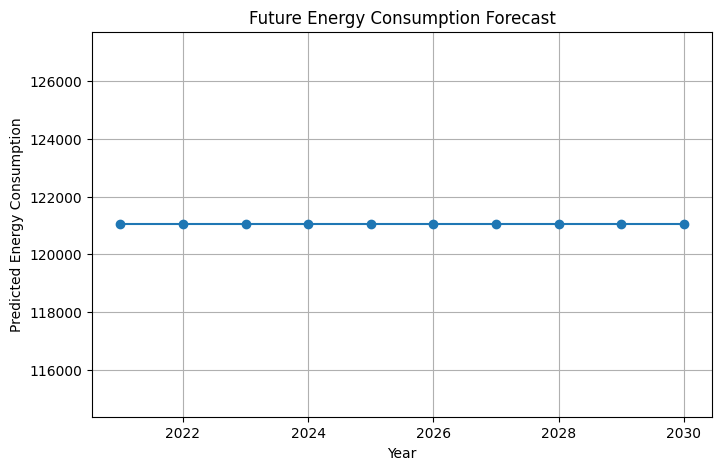

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(forecast_df["Year"], forecast_df["Predicted Energy Consumption"], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Predicted Energy Consumption")
plt.title("Future Energy Consumption Forecast")
plt.grid()
plt.show()


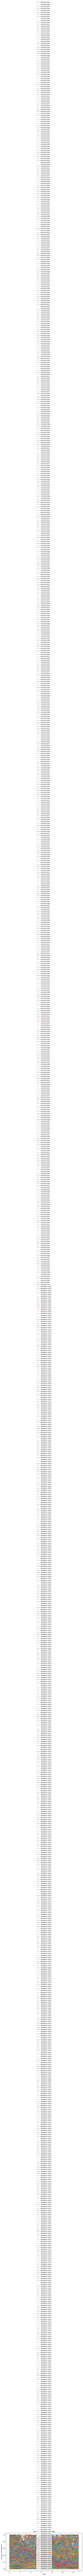

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(len(y_train)), y_train, label="Training Data")
plt.plot(range(len(y_val)), y_val, label="Validation Data")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.title("Training vs Validation Data")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)  # Single output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


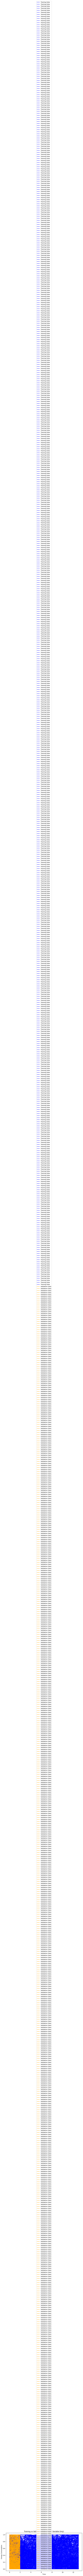

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_train, label="Training Data", color='blue')
plt.plot(y_val, label="Validation Data", color='orange')
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.title("Training vs Validation Data (Target Variable Only)")
plt.legend()
plt.show()


In [ ]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


ValueError: could not convert string to float: 'CPA08-01'

In [ ]:
# Check data scaling
print("Original Data (First 5 rows):")
print(df_lstm_encoded.head())

# Check if scaled_data has variation
print("\nScaled Data (First 5 rows):")
print(scaled_data[:5])


Original Data (First 5 rows):
    1995   1996   1997   1998   1999   2000   2001   2002   2003   2004  ...  \
0    888    946    829   1071   1185   1329   1692   1756    899    985  ...   
1   1477   1346   1275   1056    873    678    545    669    132     20  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3   4580   3610   2976   2897   2456   1926   1573   1504   1301   1182  ...   
4  94156  94655  94546  94130  93709  82778  81461  81573  82385  83557  ...   

   Energy Carriers_Diesel fuels  \
0                         False   
1                         False   
2                         False   
3                         False   
4                          True   

   Energy Carriers_Electricity and other energy sources  \
0                                              False      
1                                              False      
2                                              False      
3                                         

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Build a better LSTM model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False, activation='relu')),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 925ms/step - loss: 0.2231 - mae: 0.3715 - val_loss: 0.1127 - val_mae: 0.3072
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.1120 - mae: 0.2869 - val_loss: 0.1086 - val_mae: 0.2991
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1181 - mae: 0.2900 - val_loss: 0.0991 - val_mae: 0.2646
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1196 - mae: 0.2862 - val_loss: 0.1029 - val_mae: 0.2508
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1071 - mae: 0.2772 - val_loss: 0.0999 - val_mae: 0.2579
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.1130 - mae: 0.2765 - val_loss: 0.1037 - val_mae: 0.2877
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1136 - mae: 0.2820 - val_loss: 0.1156 - val_mae: 0.3130
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.1133 - mae: 0.2945 - val_loss: 0.1063 - val_mae: 0.2944
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1020 - mae: 0.

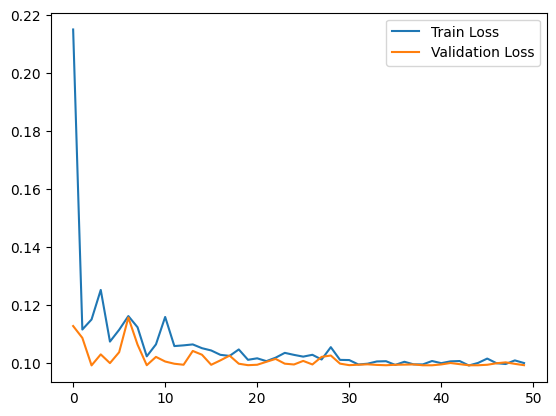

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8)

# Plot the loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Ensure X_future has the same number of features as when fitting the scaler
future_predictions = model.predict(X_future)

# Reshape future_predictions to match original scaler dimensions
future_predictions = future_predictions.reshape(-1, 1)  # Ensure it's a 2D array

# Apply inverse transformation correctly
future_predictions = scaler.inverse_transform(future_predictions)

print(future_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


ValueError: non-broadcastable output operand with shape (10,1) doesn't match the broadcast shape (10,624)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Improved LSTM Model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False, activation='relu')),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for forecasting
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Make predictions
future_predictions = model.predict(X_future)

# Inverse transform back to original scale
future_predictions = scaler.inverse_transform(future_predictions)

print(future_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


ValueError: non-broadcastable output operand with shape (10,1) doesn't match the broadcast shape (10,624)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Improved LSTM Model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False, activation='relu')),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for forecasting
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
import numpy as np

# Convert categorical variables to numeric (if necessary)
df_lstm_encoded = df_lstm_encoded.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Check if all values are numeric
print(df_lstm_encoded.dtypes)

# Scale data again
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm_encoded)

# Reshape for LSTM (Samples, Time Steps, Features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))


1995                                          int64
1996                                          int64
1997                                          int64
1998                                          int64
1999                                          int64
                                              ...  
Energy Carriers_Heavy fuel oil                 bool
Energy Carriers_Other mineral oil products     bool
Energy Carriers_Petrol                         bool
Energy Carriers_Renewable energies             bool
Energy Carriers_Total                          bool
Length: 87, dtype: object


In [ ]:
print(future_predictions.shape)  # Check before inverse transform


(10, 1)


In [ ]:
future_predictions = future_predictions.reshape(-1, 1)  # Reshape before inverse transform
future_predictions = scaler.inverse_transform(future_predictions)


ValueError: non-broadcastable output operand with shape (10,1) doesn't match the broadcast shape (10,87)

In [ ]:
# Use only the column corresponding to the target variable for inverse transformation
future_predictions = scaler.inverse_transform(
    np.concatenate(
        [np.zeros((future_predictions.shape[0], scaler.n_features_in_ - 1)), future_predictions],
        axis=1
    )
)[:, -1]  # Extract only the last column (which contains predictions)


In [ ]:
scaler_target = MinMaxScaler()
scaler_target.fit(y_train.reshape(-1, 1))  # Fit on actual target variable (y_train)

# Apply inverse transform using only the target variable scaler
future_predictions = scaler_target.inverse_transform(future_predictions)


ValueError: Expected 2D array, got 1D array instead:
array=[0.02576851 0.02576851 0.02576851 0.02576851 0.02576851 0.02576851
 0.02576851 0.02576851 0.02576851 0.02576851].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print("Scaler fitted on:", scaler.n_features_in_, "features")


Scaler fitted on: 87 features


In [ ]:
future_predictions = future_predictions.reshape(-1, 1)  # Ensure it is 2D


In [ ]:
scaler_target = MinMaxScaler()
scaler_target.fit(y_train.reshape(-1, 1))  # Fit on the actual target variable
future_predictions = scaler_target.inverse_transform(future_predictions)


In [ ]:
print(future_predictions[:10])  # Print first 10 predictions


[[0.02576851]
 [0.02576851]
 [0.02576851]
 [0.02576851]
 [0.02576851]
 [0.02576851]
 [0.02576851]
 [0.02576851]
 [0.02576851]
 [0.02576851]]


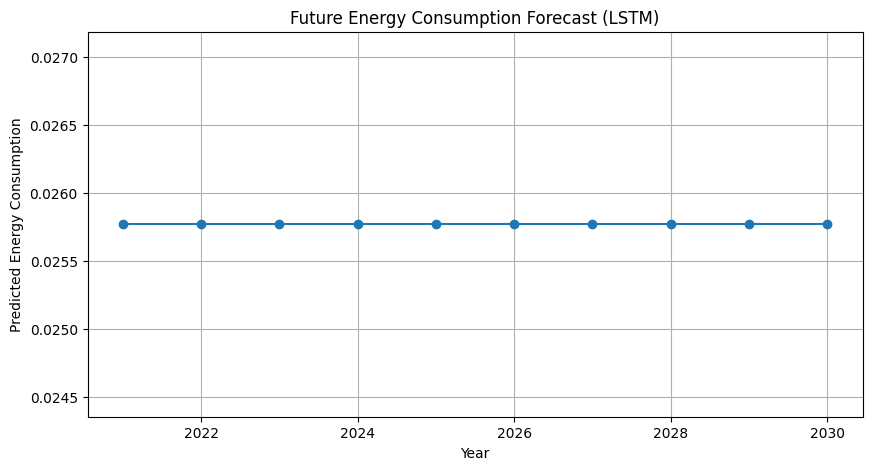

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(future_years, future_predictions, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Predicted Energy Consumption")
plt.title("Future Energy Consumption Forecast (LSTM)")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

y_pred = model.predict(X_test)  # Predict on test data
y_pred = scaler_target.inverse_transform(y_pred)  # Inverse transform

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")  # Display as percentage


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


ValueError: y_true and y_pred have different number of output (624!=1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Load Data
df = pd.read_csv("/content/Use of Energy of Energy Carriers.csv")  # Replace with your dataset path

# Data Preprocessing
# Assuming the target variable is 'Energy_Consumption'
target = 'Energy Consumption'
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest for Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# Selecting Top Features
selected_features = feature_importances[:10].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train-Test Split with Selected Features
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# LSTM Model Preparation
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False, activation='relu')),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test), epochs=50, batch_size=16)
y_pred_lstm = model.predict(X_test_lstm)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)

# Compare Results
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LSTM"],
    "MSE": [mse_rf, mse_xgb, mse_lstm],
    "RMSE": [rmse_rf, rmse_xgb, rmse_lstm],
    "MAPE": [mape_rf, mape_xgb, mape_lstm]
})

print(results)

# Forecast Visualization
years = np.arange(2021, 2031)
plt.figure(figsize=(10,5))
plt.plot(years, y_pred_rf[:10], 'o-', label="Random Forest")
plt.plot(years, y_pred_xgb[:10], 'o-', label="XGBoost")
plt.plot(years, y_pred_lstm[:10], 'o-', label="LSTM")
plt.xlabel("Year")
plt.ylabel("Predicted Energy Consumption")
plt.title("Future Energy Consumption Forecast")
plt.legend()
plt.grid()
plt.show()


KeyError: 'Energy Consumption'

In [ ]:
print(forecast_df.columns)


Index(['Year', 'Predicted Energy Consumption'], dtype='object')


In [ ]:
print(forecast_df.head())  # Check column names and data


   Year  Predicted Energy Consumption
0  2021                 121042.921875
1  2022                 121042.921875
2  2023                 121042.921875
3  2024                 121042.921875
4  2025                 121042.921875


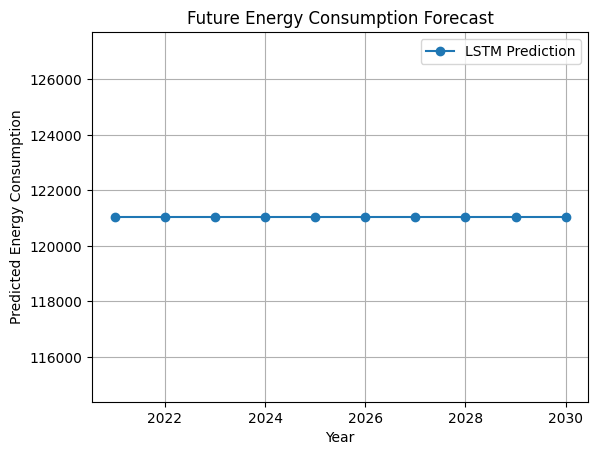

In [ ]:
plt.plot(forecast_df["Year"], forecast_df["Predicted Energy Consumption"], marker="o", label="LSTM Prediction")
plt.xlabel("Year")
plt.ylabel("Predicted Energy Consumption")
plt.title("Future Energy Consumption Forecast")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [ ]:
# Load dataset
df = pd.read_csv("/content/Use of Energy of Energy Carriers.csv")  # Change this to your dataset filename

# Check first few rows
print(df.head())

# Convert categorical columns to numeric if needed
df = pd.get_dummies(df)  # One-hot encoding for categorical variables


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers   1995   1996   1997   1998  \
0              Hard coal and hard coal products    888    946    829   1071   
1  Brown coal (lignite) and brown coal products   1477   1346   1275   1056   
2                                     Crude oil      0      0      0      0   
3                                        Petrol   4580   3610   2976   2897   
4                                  Diesel fuels  94156  94655  94546  94130   

    1999   2000   2001  ...   2011   2012   2013   2014   2015   2016   2017  \
0   1185   1329   1692  ...    360   1080 

In [ ]:
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['Energy Consumption'])  # Ensure the correct target column name
y = df['Energy Consumption']

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape for LSTM (Samples, Time Steps, Features)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


KeyError: "['Energy Consumption'] not found in axis"

In [ ]:
print(df.columns)  # This will display all column names in your dataframe


Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004',
       ...
       'Energy Carriers_Diesel fuels',
       'Energy Carriers_Electricity and other energy sources',
       'Energy Carriers_Gases',
       'Energy Carriers_Hard coal and hard coal products',
       'Energy Carriers_Heating oil', 'Energy Carriers_Heavy fuel oil',
       'Energy Carriers_Other mineral oil products', 'Energy Carriers_Petrol',
       'Energy Carriers_Renewable energies', 'Energy Carriers_Total'],
      dtype='object', length=135)


In [ ]:
for col in df.columns:
    print(col)


1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Branch Code_CPA08-01
Branch Code_CPA08-02
Branch Code_CPA08-03
Branch Code_CPA08-05
Branch Code_CPA08-06
Branch Code_CPA08-07-01
Branch Code_CPA08-10-01
Branch Code_CPA08-13-01
Branch Code_CPA08-16
Branch Code_CPA08-17
Branch Code_CPA08-18
Branch Code_CPA08-19
Branch Code_CPA08-20
Branch Code_CPA08-21
Branch Code_CPA08-22
Branch Code_CPA08-23
Branch Code_CPA08-24-01
Branch Code_CPA08-25
Branch Code_CPA08-26
Branch Code_CPA08-27
Branch Code_CPA08-28
Branch Code_CPA08-29
Branch Code_CPA08-30
Branch Code_CPA08-31-01
Branch Code_CPA08-33
Branch Code_CPA08-35
Branch Code_CPA08-36-01
Branch Code_CPA08-37-01
Branch Code_CPA08-41-01
Branch Code_CPA08-43
Branch Code_CPA08-45-01
Branch Code_CPA08-46
Branch Code_CPA08-47
Branch Code_CPA08-49
Branch Code_CPA08-50
Branch Code_CPA08-51
Branch Code_CPA08-52
Branch Code_CPA08-53
Branch Code_CPA08-I
Branch Code_CPA08-J
Branc